### Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import optuna
from sklearn.preprocessing import StandardScaler

### Read Data

In [5]:
df = pd.read_csv('Adidas US Sales Datasets.csv')

In [6]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2/1/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,3/1/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,4/1/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,5/1/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


### Data Preprocessing

In [7]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format="%d/%m/%Y")

In [8]:
df['Retailer ID'] = df['Retailer ID'].astype('str')

In [9]:
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').astype('float')

In [10]:
df['Units Sold'] = df['Units Sold'].str.replace(',', '').astype('int')

In [11]:
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.replace(',', '').astype('float')

In [12]:
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.replace(',', '').astype('float')

In [13]:
df.dtypes

Retailer                    object
Retailer ID                 object
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int32
Total Sales                float64
Operating Profit           float64
Operating Margin            object
Sales Method                object
dtype: object

In [14]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,30%,In-store


In [15]:
df['Product Gender'] = df['Product'].apply(lambda x: x.split("'s")[0])

In [16]:
df['Product Type'] = df['Product'].apply(lambda x: x.split(' ')[-1])

In [17]:
df['weekday'] = df['Invoice Date'].dt.day_name()

### Data Exploration

In [18]:
features = ['Sales Method','Retailer','Region','Product Gender','Product Type','weekday']

### Distribution of Transactions

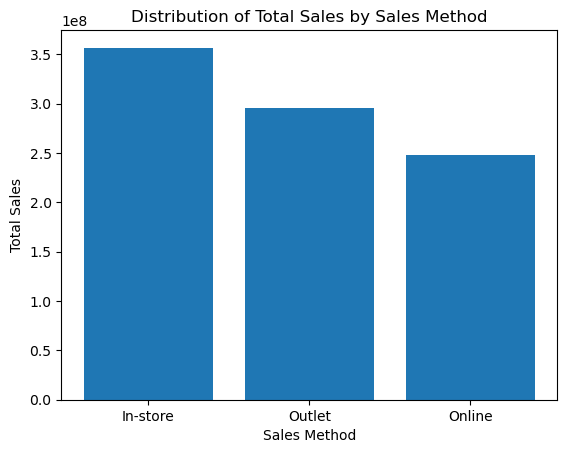

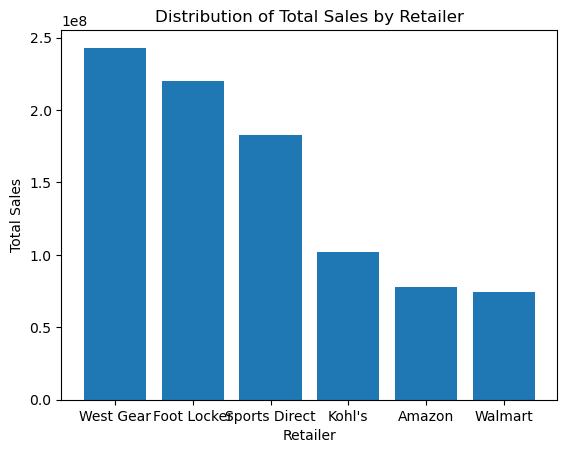

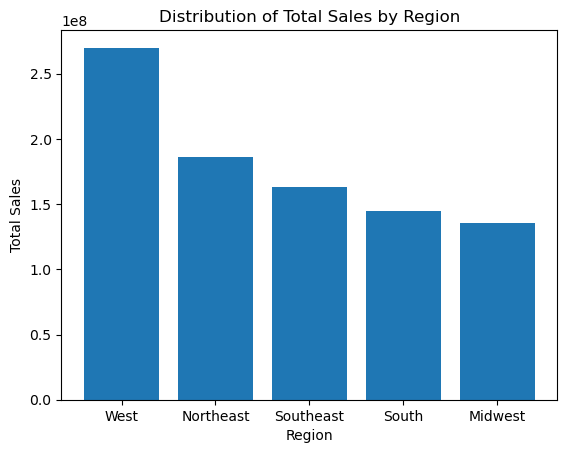

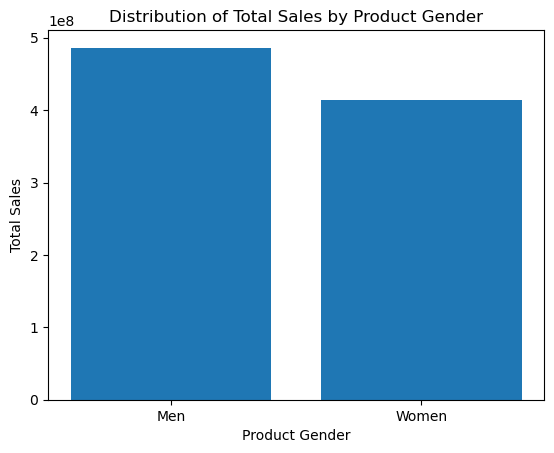

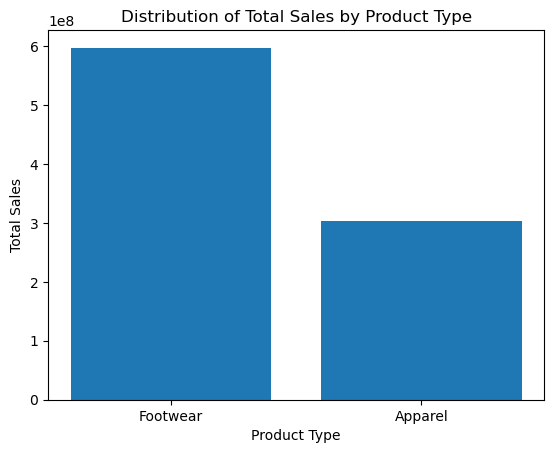

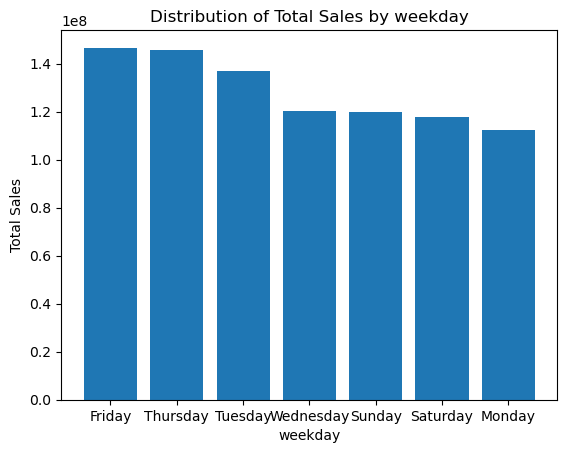

In [19]:
for feature in features:

    df_temp = df[[feature,'Total Sales']].groupby(feature).sum()['Total Sales'].sort_values(ascending=False)
    plt.bar(df_temp.index, df_temp.values)

    # Add title and labels
    plt.title('Distribution of Total Sales by {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Total Sales')

    # Show the plot
    plt.show()

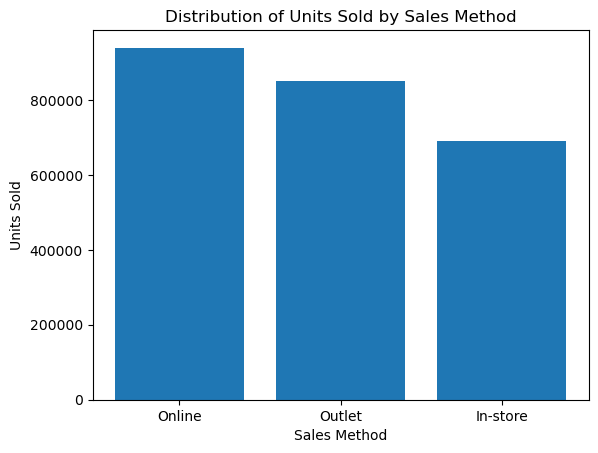

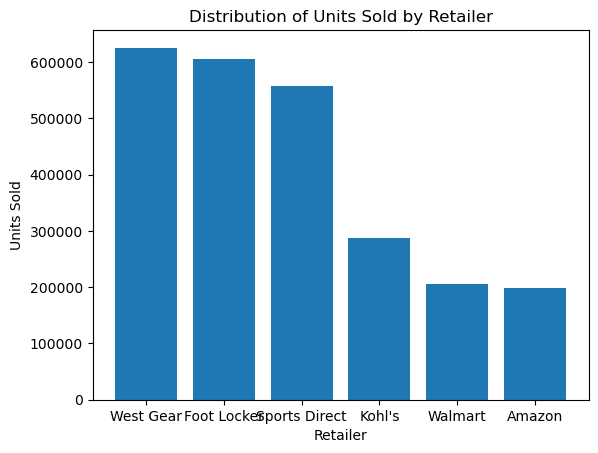

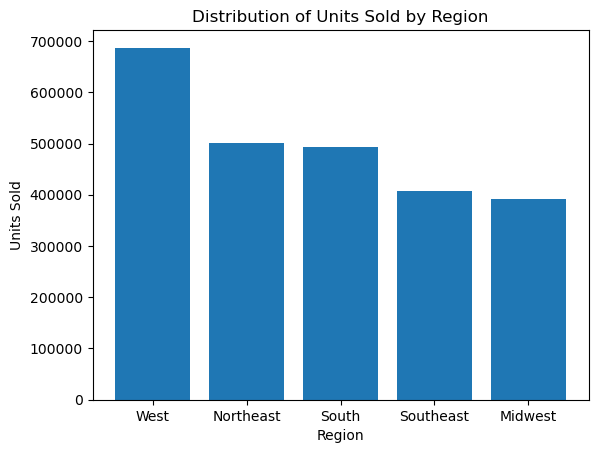

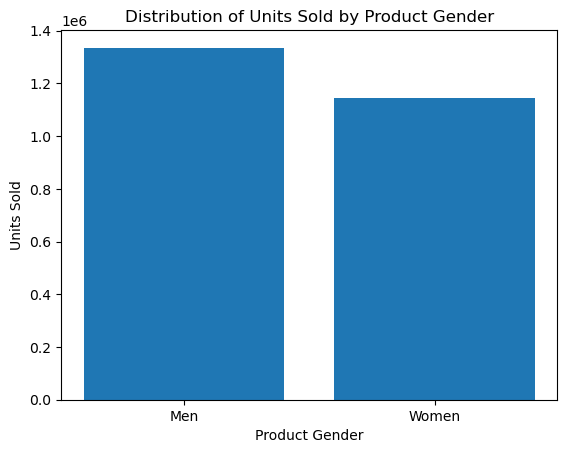

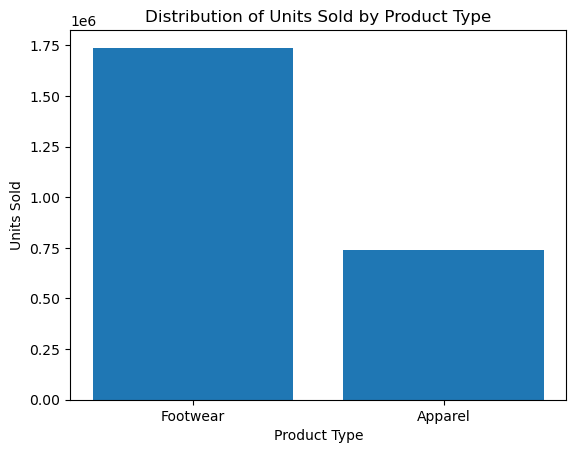

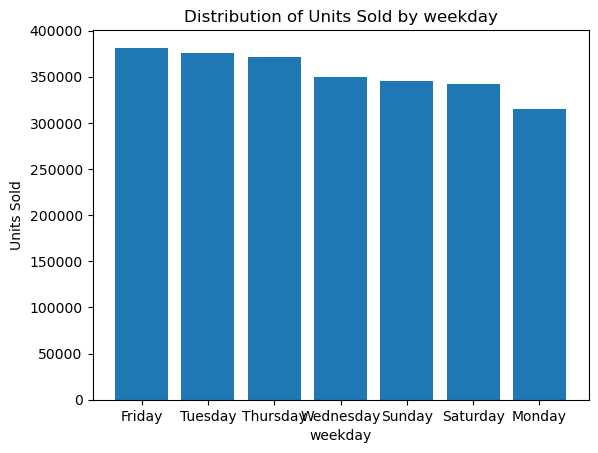

In [20]:
for feature in features:

    df_temp = df[[feature,'Units Sold']].groupby(feature).sum()['Units Sold'].sort_values(ascending=False)

    plt.bar(df_temp.index, df_temp.values)

    # Add title and labels
    plt.title('Distribution of Units Sold by {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Units Sold')

    # Show the plot
    plt.show()

### Distribution of Unit Price

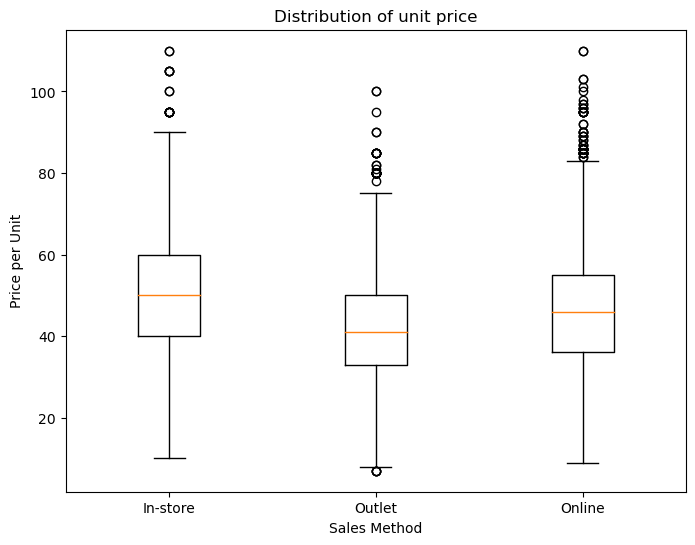

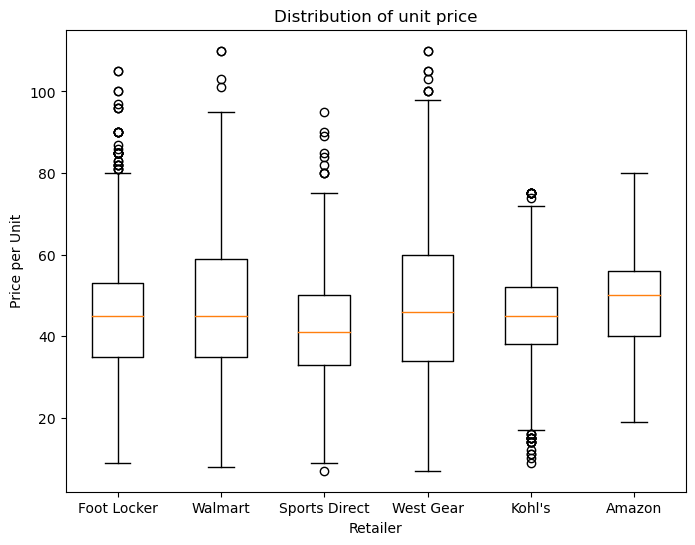

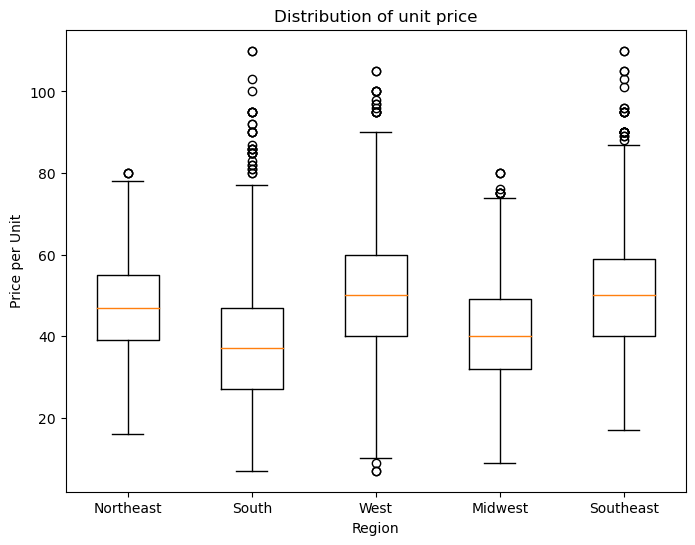

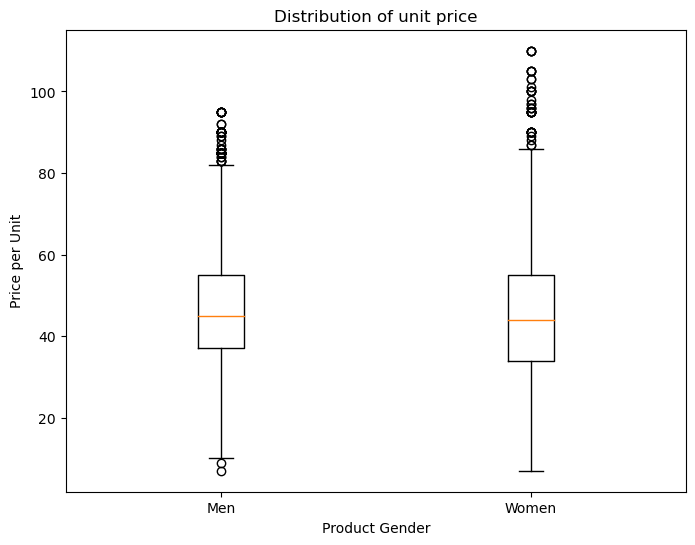

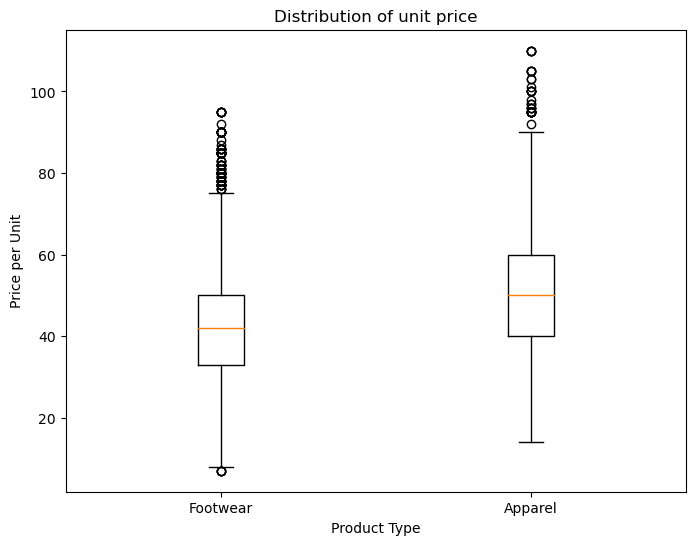

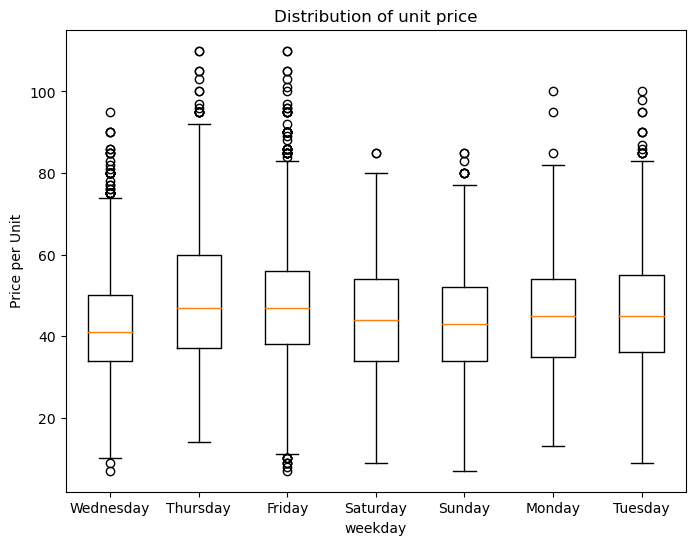

In [21]:
for feature in features:

    df_temp = df[[feature,'Price per Unit']]

    plt.figure(figsize=(8, 6))

    plt.title('Distribution of unit price')
    plt.xlabel(feature)
    plt.ylabel('Price per Unit')
    data = [df[df[feature] == category]['Price per Unit'] for category in df[feature].unique()]
    plt.boxplot(data, labels=df[feature].unique())

    # Show the plot
    plt.show()

### Machine Learning

In [22]:
df = df.drop(columns=['Invoice Date','Retailer ID','Product Type','Product Gender','Operating Margin','Operating Profit','Total Sales'])

In [23]:
df

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Sales Method,weekday
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,In-store,Wednesday
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,In-store,Thursday
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,In-store,Friday
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,In-store,Saturday
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,In-store,Sunday
...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,Outlet,Sunday
9644,Foot Locker,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,Outlet,Sunday
9645,Foot Locker,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,Outlet,Monday
9646,Foot Locker,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,Outlet,Monday


In [24]:
df_with_dummies = pd.get_dummies(df, columns=['weekday','Retailer','Region','State','City','Product','Sales Method'])

In [25]:
df_with_dummies

,Price per Unit,Units Sold,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,Retailer_Amazon,...,City_Wilmington,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,50.0,1200,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False
1,50.0,1000,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2,40.0,1000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,45.0,850,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,60.0,900,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,50.0,64,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
9644,41.0,105,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
9645,41.0,184,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9646,42.0,70,False,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [26]:
# Define the target
X = df_with_dummies.drop(columns=['Units Sold'])  # Features
y = df_with_dummies['Units Sold']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Model parameters to optimize
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    # Create a linear regression model with the trial parameters
    model = LinearRegression(fit_intercept=fit_intercept)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Create the Optuna study and optimize it
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best parameters from Optuna
best_params = study.best_params
print("Best Parameters: ", best_params)

# Step 8: Train the final model with the best parameters
final_model = LinearRegression(**best_params)
final_model.fit(X_train_scaled, y_train)

[I 2024-12-23 17:11:20,208] A new study created in memory with name: no-name-2f055520-456f-429c-a305-c1e8955f2f68
[I 2024-12-23 17:11:20,290] Trial 0 finished with value: 154461.36898559568 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 154461.36898559568.
[I 2024-12-23 17:11:20,317] Trial 1 finished with value: 22574.2695002108 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 22574.2695002108.
[I 2024-12-23 17:11:20,339] Trial 2 finished with value: 154461.36898559568 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 22574.2695002108.
[I 2024-12-23 17:11:20,361] Trial 3 finished with value: 154461.36898559568 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 22574.2695002108.
[I 2024-12-23 17:11:20,382] Trial 4 finished with value: 154461.36898559568 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 22574.2695002108.
[I 2024-12-23 17:11:20,406] Trial 5 finished with value: 22574.2695

Best Parameters:  {'fit_intercept': True}


LinearRegression()

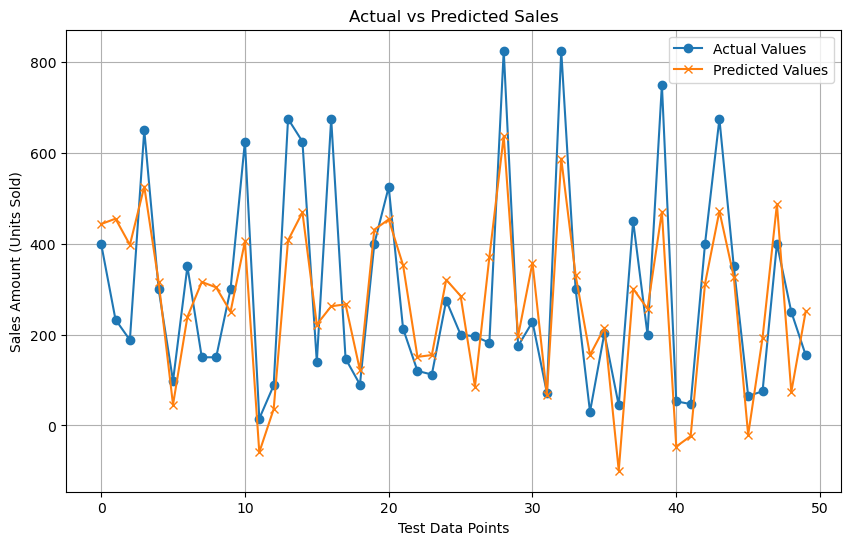

In [30]:
example_data = X_test_scaled[:50]  # Using a subset of 50 rows of the test set
actual_values = y_test[:50]

# Making predictions
predicted_values = final_model.predict(example_data)

plt.figure(figsize=(10,6))
plt.plot(actual_values.values, label='Actual Values', marker='o')
plt.plot(predicted_values, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Data Points')
plt.ylabel('Sales Amount (Units Sold)')
plt.legend()
plt.grid(True)

# Display the chart
plt.show()

In [34]:
# Evaluation of the model on the test set
y_pred = final_model.predict(X_test_scaled)
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R-squared


# Creating a DataFrame to store the evaluation metrics
evaluation_metrics = {
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)'],
    'Value': [mse, rmse, mae, r2]
}

metrics_df = pd.DataFrame(evaluation_metrics)
metrics_df

,Metric,Value
0,Mean Squared Error (MSE),22574.269500
1,Root Mean Squared Error (RMSE),150.247361
2,Mean Absolute Error (MAE),114.175447
3,R-squared (R2),0.521738
